In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
dataset=pd.read_csv('/content/penguins_size.csv')
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
dataset['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
dataset.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df=dataset.dropna(axis=0)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df.shape


(334, 7)

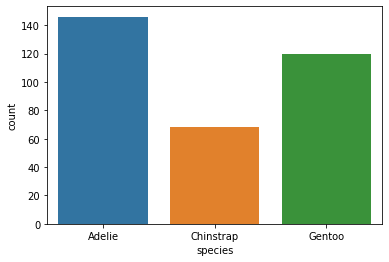

In [7]:
import seaborn as sns
sns.countplot(df['species'])

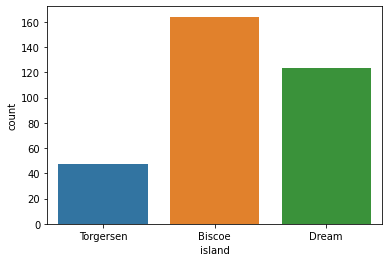

In [8]:
sns.countplot(df['island'])

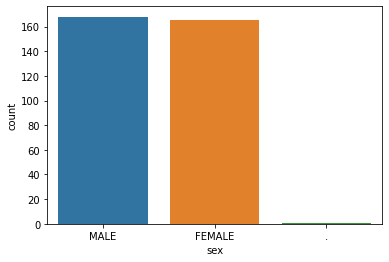

In [9]:
sns.countplot(df['sex'])

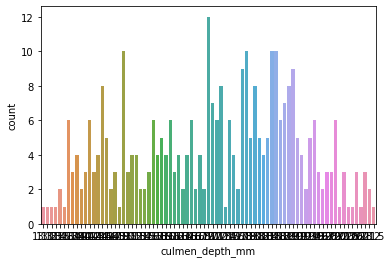

In [10]:
sns.countplot(df['culmen_depth_mm'])

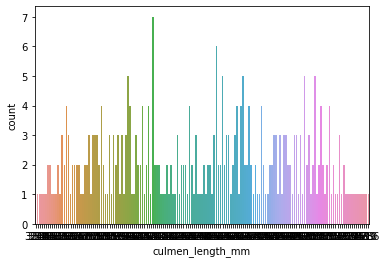

In [11]:
sns.countplot(df['culmen_length_mm'])

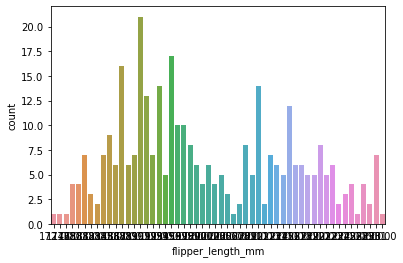

In [12]:
sns.countplot(df['flipper_length_mm'])

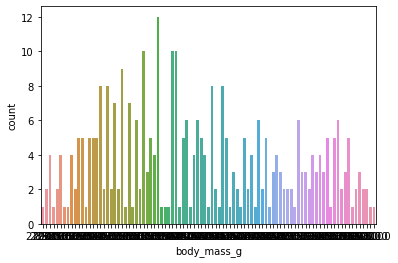

In [13]:
sns.countplot(df['body_mass_g'])

In [14]:
data=df.drop(['island','sex'],axis=1)

In [15]:
data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [16]:
data.shape


(334, 5)

In [17]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,1:5]
y=data.iloc[:,0]


In [18]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 4)
(34, 4)
(300,)
(34,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,10)
print(k_range)



range(1, 10)


In [28]:
scores={}
score_list=[]
for i in k_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prediction=knn.predict(x_test)
  scores[i]=metrics.accuracy_score(y_test,prediction)
  score_list.append(scores[i])
scores


{1: 0.9411764705882353,
 2: 0.8235294117647058,
 3: 0.8235294117647058,
 4: 0.8529411764705882,
 5: 0.7941176470588235,
 6: 0.7941176470588235,
 7: 0.7647058823529411,
 8: 0.7647058823529411,
 9: 0.8235294117647058}

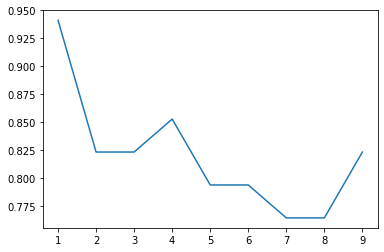

In [29]:
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.show()

In [30]:
count_missclassified=(y_test!=prediction).sum()
count_missclassified

6

In [38]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
n1=float(input())
n2=float(input())
n3=float(input())
n4=float(input())
a=[[n1,n2,n3,n4]]
pred=knn.predict(a)
print(pred)

2.3
3.9
5.6
11
['Adelie']
